In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/home-data-for-ml-course/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.isnull().values.sum()

np.int64(7829)

In [4]:
total_missing = data.isnull().values.sum()
total_cells = np.prod(data.shape)
percent_missing = total_missing / total_cells * 100
print(f'{percent_missing:.2f}% of the data is missing.')

6.62% of the data is missing.


In [5]:
for col in data.columns:
    if data.isnull().sum()[col] != 0:
        print(f'{col} -> {data.isnull().sum()[col]}')

LotFrontage -> 259
Alley -> 1369
MasVnrType -> 872
MasVnrArea -> 8
BsmtQual -> 37
BsmtCond -> 37
BsmtExposure -> 38
BsmtFinType1 -> 37
BsmtFinType2 -> 38
Electrical -> 1
FireplaceQu -> 690
GarageType -> 81
GarageYrBlt -> 81
GarageFinish -> 81
GarageQual -> 81
GarageCond -> 81
PoolQC -> 1453
Fence -> 1179
MiscFeature -> 1406


In [6]:
data.shape[0]

1460

In [7]:
data.drop(columns=['Alley', 'MiscFeature', 'Fence', 'PoolQC'], inplace=True)
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['BsmtQual'] = data['BsmtQual'].fillna(0)
data['BsmtCond'] = data['BsmtCond'].fillna(0)
data['BsmtExposure'] = data['BsmtExposure'].fillna(0)
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(0)
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(0)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['FireplaceQu'] = data['FireplaceQu'].fillna(0)
data['GarageType'] = data['GarageType'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna(0)
data['GarageQual'] = data['GarageQual'].fillna(0)
data['GarageCond'] = data['GarageCond'].fillna(0)

In [8]:
data.isnull().values.sum()

np.int64(0)

In [9]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [10]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [11]:
for col in data.columns:
    print(f'{col} --> {data[col].dtype}')

Id --> int64
MSSubClass --> int64
MSZoning --> object
LotFrontage --> float64
LotArea --> int64
Street --> object
LotShape --> object
LandContour --> object
Utilities --> object
LotConfig --> object
LandSlope --> object
Neighborhood --> object
Condition1 --> object
Condition2 --> object
BldgType --> object
HouseStyle --> object
OverallQual --> int64
OverallCond --> int64
YearBuilt --> int64
YearRemodAdd --> int64
RoofStyle --> object
RoofMatl --> object
Exterior1st --> object
Exterior2nd --> object
MasVnrType --> object
MasVnrArea --> float64
ExterQual --> object
ExterCond --> object
Foundation --> object
BsmtQual --> object
BsmtCond --> object
BsmtExposure --> object
BsmtFinType1 --> object
BsmtFinSF1 --> int64
BsmtFinType2 --> object
BsmtFinSF2 --> int64
BsmtUnfSF --> int64
TotalBsmtSF --> int64
Heating --> object
HeatingQC --> object
CentralAir --> object
Electrical --> object
1stFlrSF --> int64
2ndFlrSF --> int64
LowQualFinSF --> int64
GrLivArea --> int64
BsmtFullBath --> int64
Bsm

In [12]:
num_cols = data.select_dtypes(exclude=['object']).columns

<Axes: >

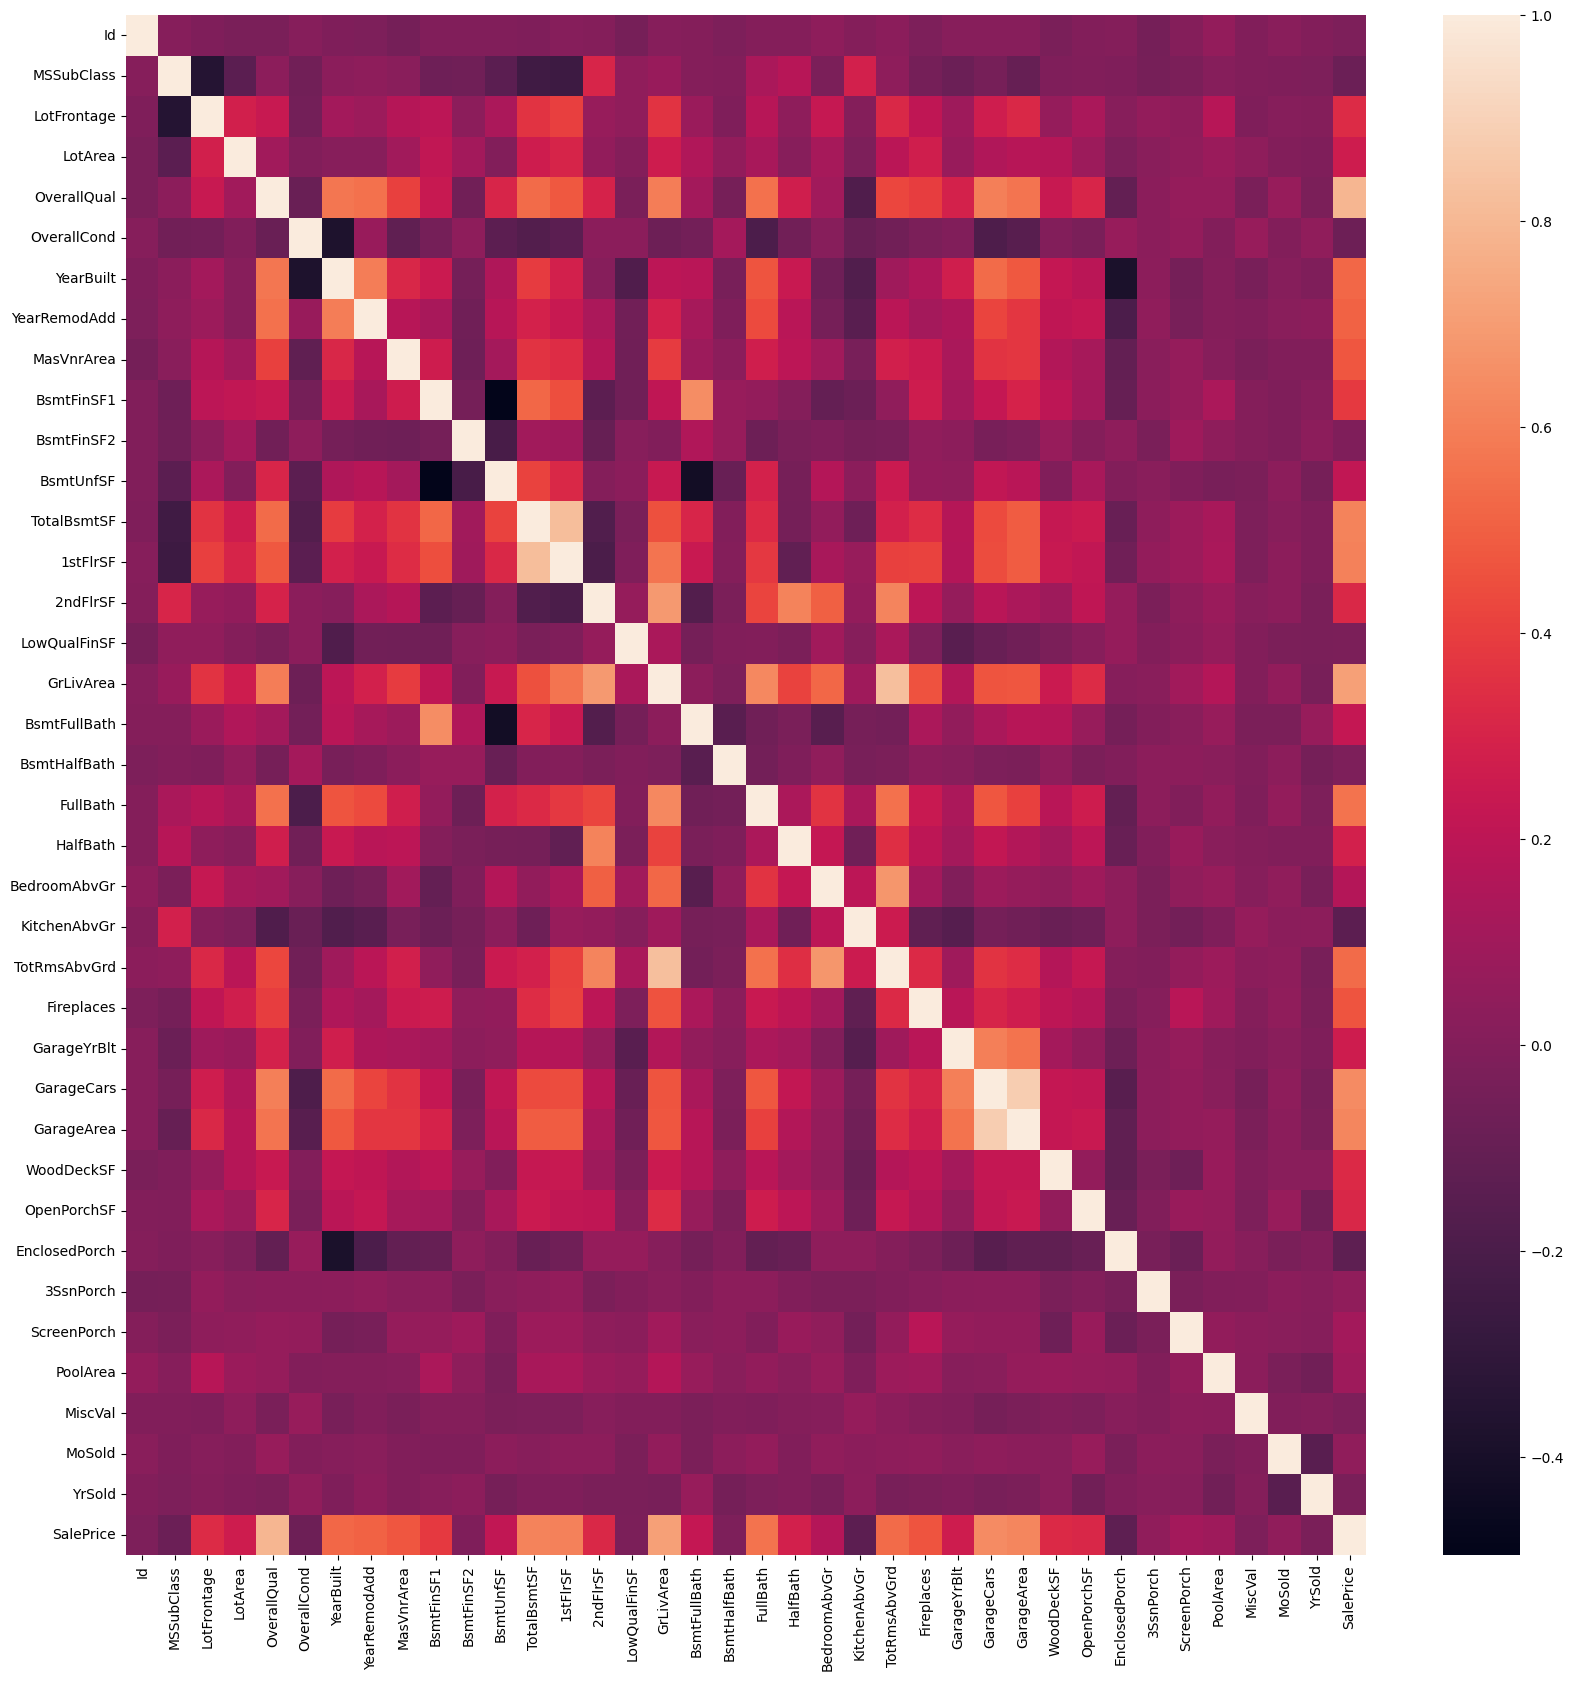

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[num_cols].corr(), annot=False)

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

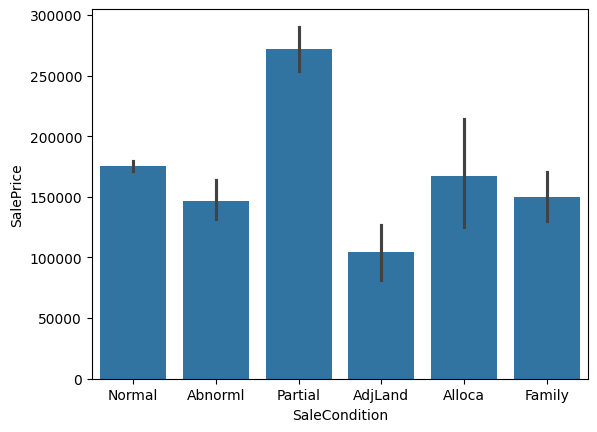

In [14]:
sns.barplot(data=data, x='SaleCondition', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

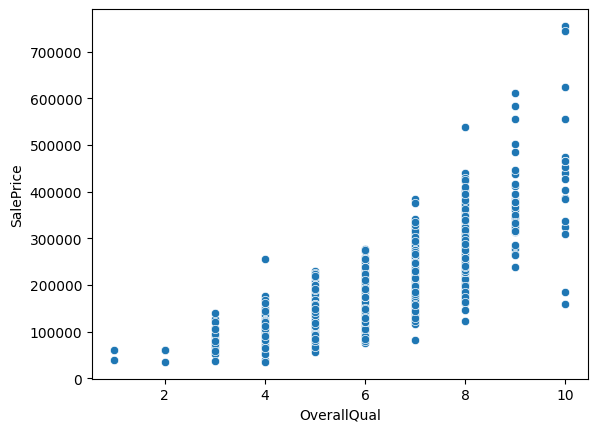

In [15]:
sns.scatterplot(data=data, x='OverallQual', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

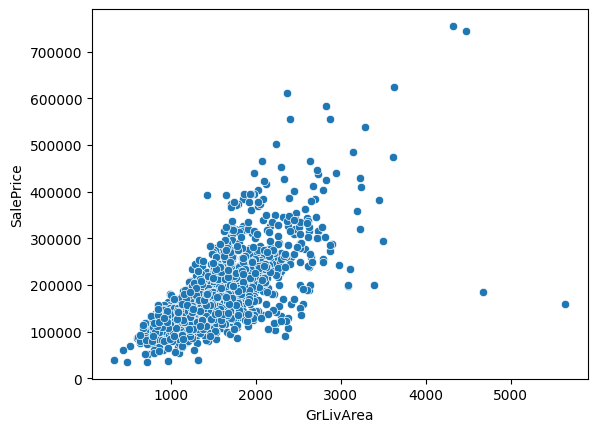

In [16]:
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

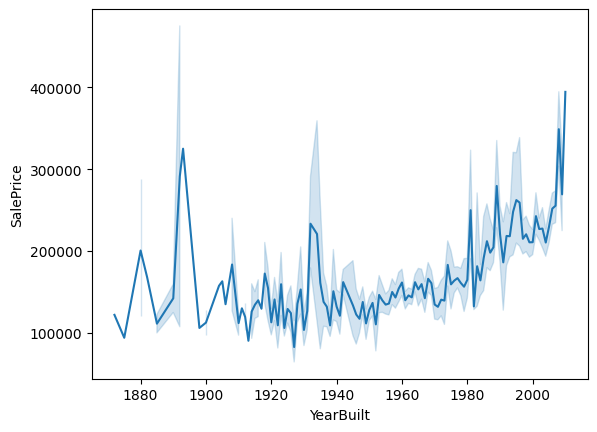

In [17]:
sns.lineplot(data=data, x='YearBuilt', y='SalePrice')

<Axes: xlabel='SalePrice', ylabel='Count'>

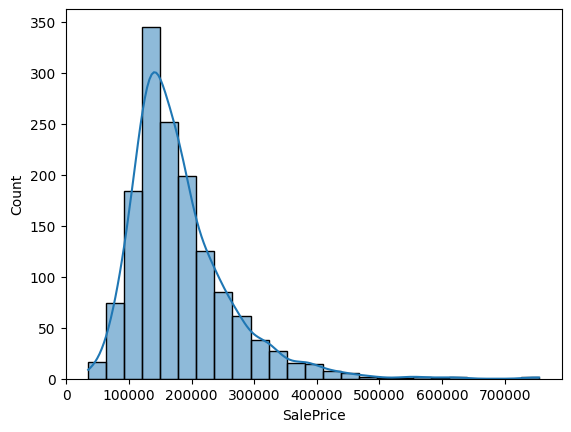

In [18]:
sns.histplot(data=data, x='SalePrice', kde=True, bins=25)

<Axes: xlabel='SalePrice', ylabel='Density'>

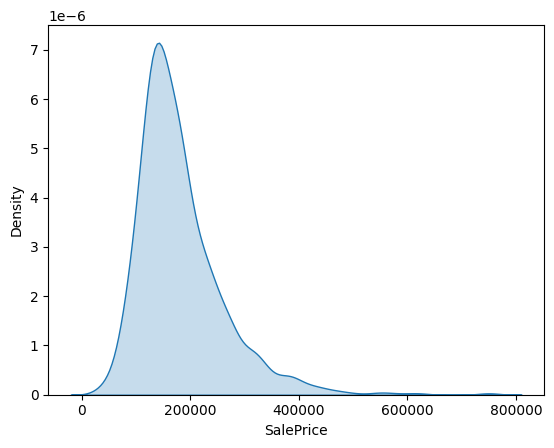

In [19]:
sns.kdeplot(data=data, x='SalePrice', fill=True)

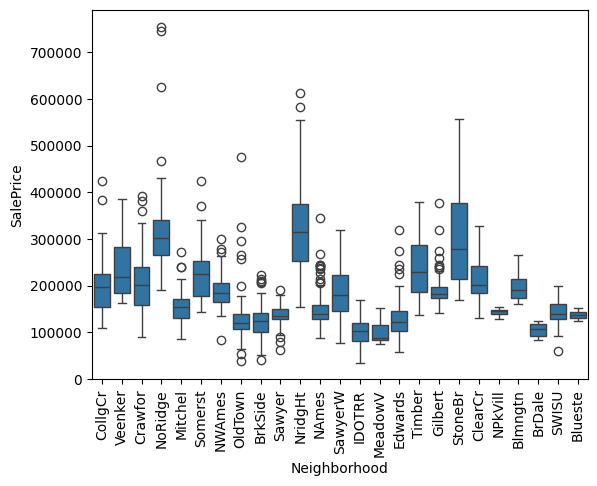

In [20]:
sns.boxplot(data=data, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

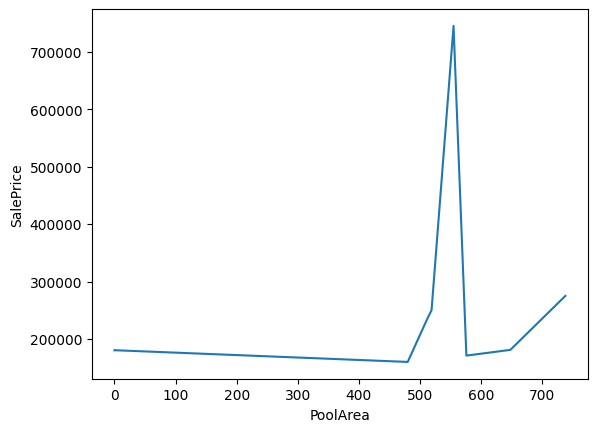

In [21]:
sns.lineplot(data=data, x='PoolArea', y='SalePrice')

In [22]:
basement_cols = [col for col in data.columns if 'Bsmt' in col]
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

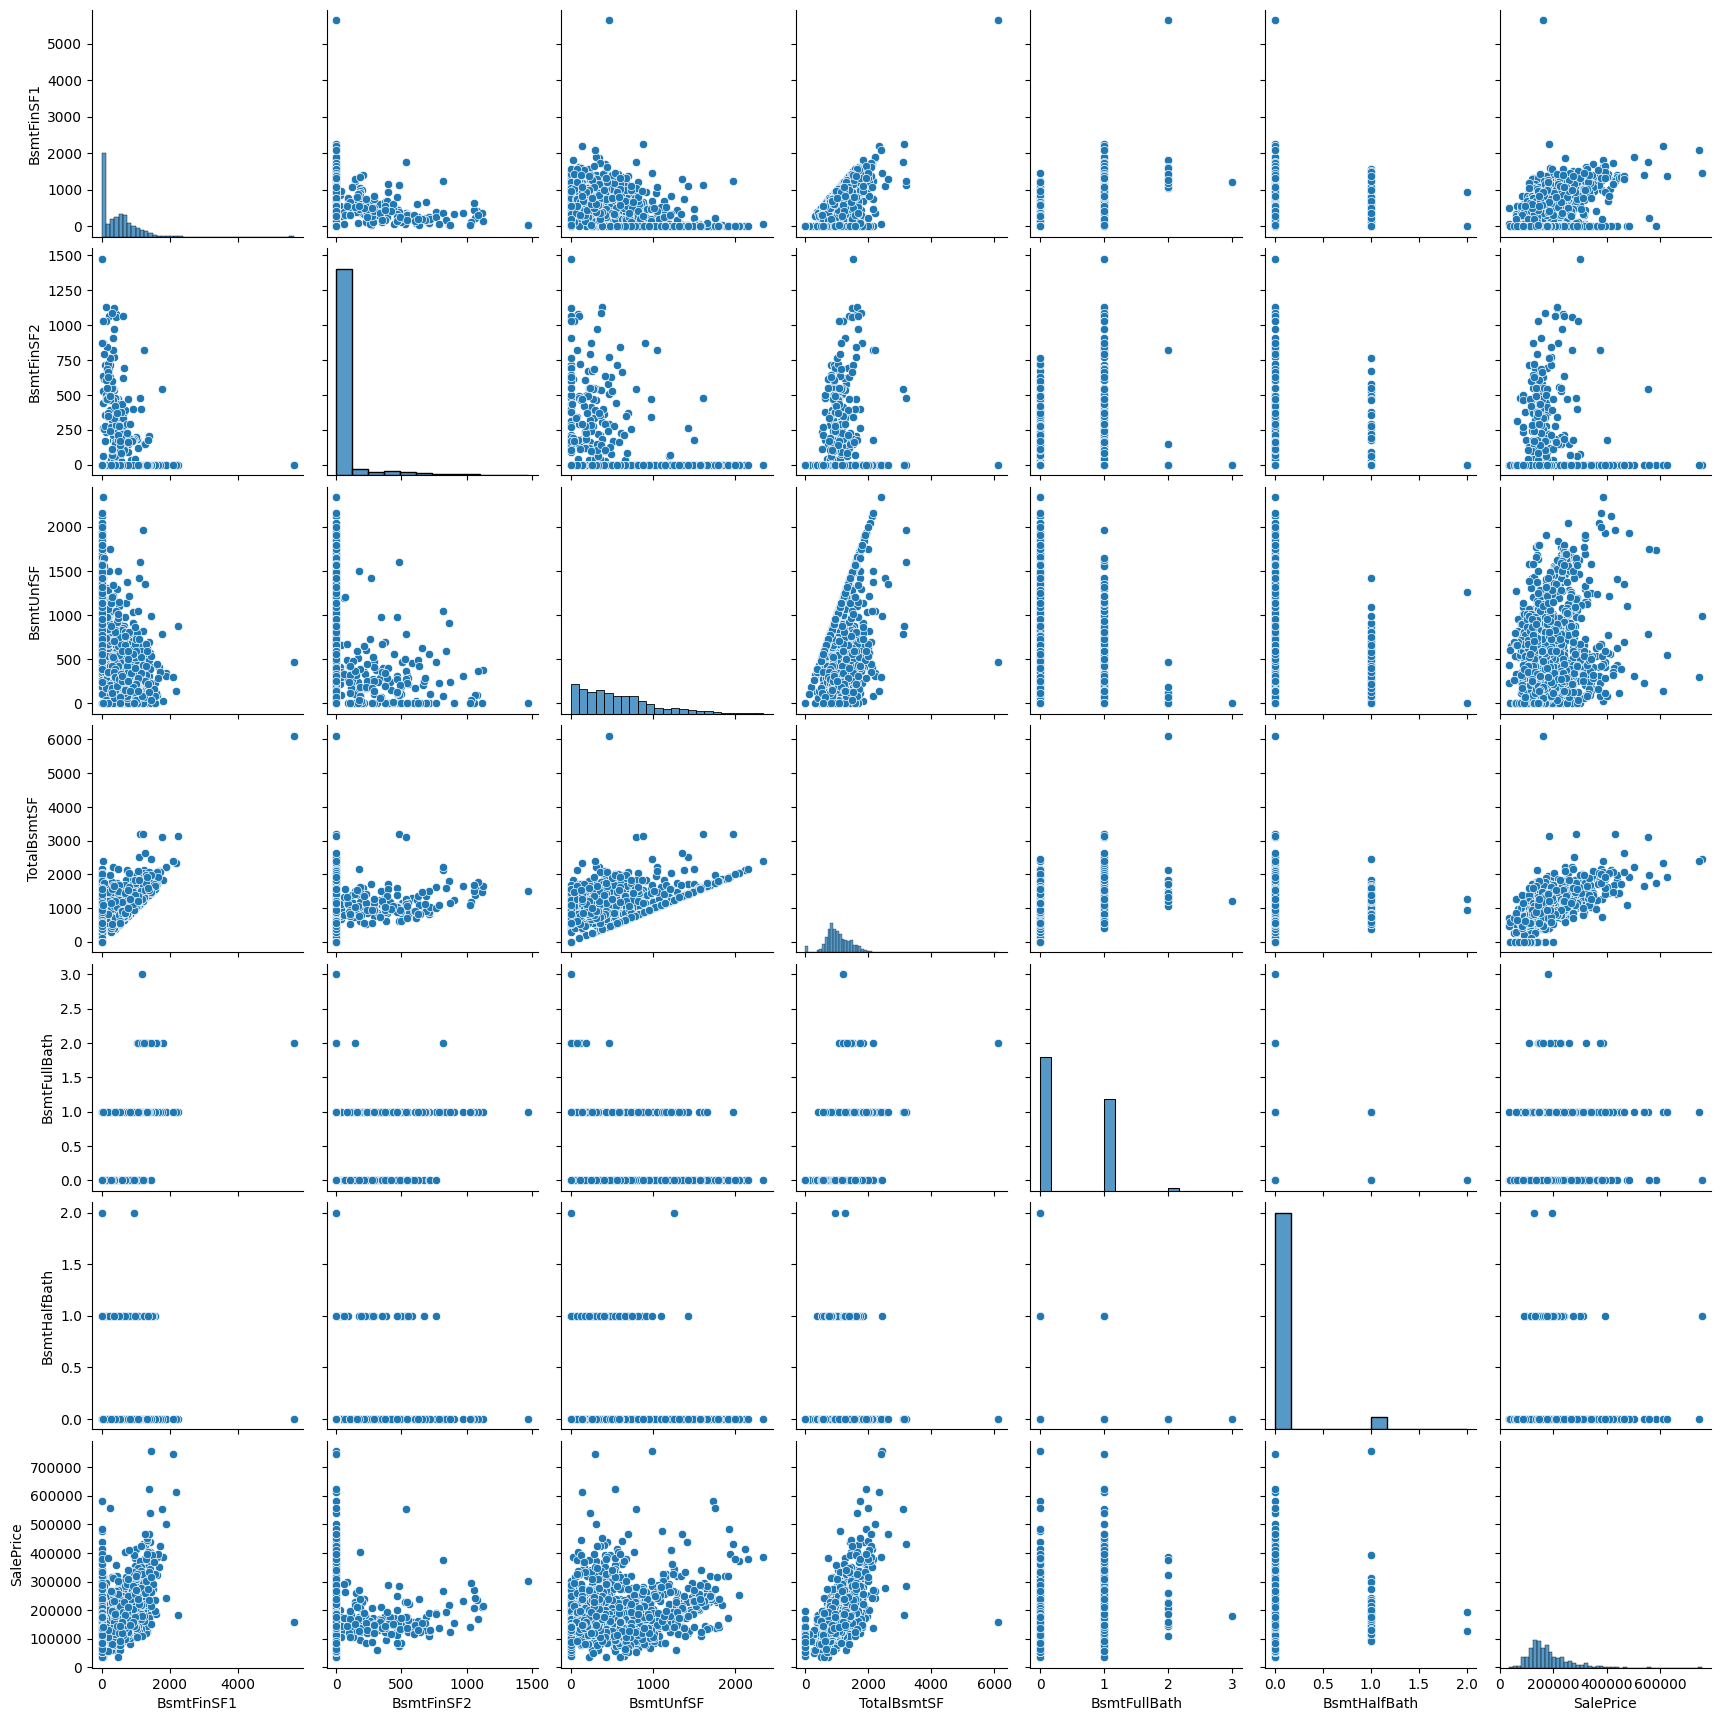

In [28]:
basement_cols.append('SalePrice')
sns.pairplot(data[basement_cols])

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

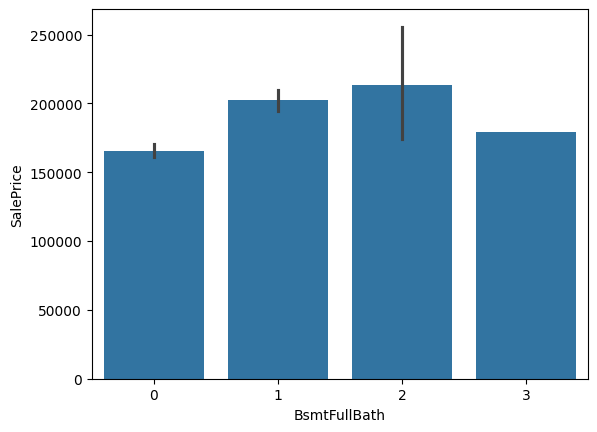

In [29]:
sns.barplot(data=data, x='BsmtFullBath', y='SalePrice')

<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

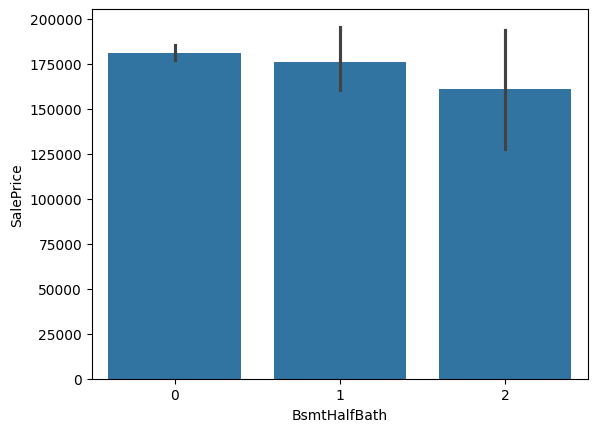

In [30]:
sns.barplot(data=data, x='BsmtHalfBath', y='SalePrice')